In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf

mpl.style.use("seaborn")

/home/jo/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Fetch Data

In [8]:
#dim ethin
dim = 38

n_electrons = 14

In [3]:
from SCFInitialGuess.utilities.dataset import make_butadien_dataset, extract_triu

def load_triu(S, P, dim):
    
    return [extract_triu(s, dim) for s in S], [extract_triu(p, dim) for p in P]

dataset, molecules = make_butadien_dataset(
    np.load("molecules_ethin_6-31g**.npy"),
    *load_triu(*np.load("dataset_ethin_6-31g**.npy"), dim), 
)

[-] 2018-04-27 23:06:59: Data set normalized. Mean value std: 0.0268160557443061


# Ethin
dim = 38

dim^2 = 2304

dim_ut = 1176

In [4]:
dim_triu = int(dim * (dim + 1) / 2)

In [5]:
from SCFInitialGuess.nn.networks import EluTrNNN
from SCFInitialGuess.nn.training import Trainer
from SCFInitialGuess.nn.cost_functions import RegularizedMSE


graph = tf.Graph()

trainer = Trainer(
    EluTrNNN([dim_triu, dim_triu, dim_triu]),
    cost_function=RegularizedMSE(alpha=1e-7),
    optimizer=tf.train.AdamOptimizer(learning_rate=1e-3)
)

trainer.setup(target_graph=graph)
network, sess = trainer.train(
    dataset,
    convergence_threshold=5e-7
)
graph = trainer.graph

[ ] 2018-04-27 23:07:06: Appending to graph: <tensorflow.python.framework.ops.Graph object at 0x7fd582641780>
[-] 2018-04-27 23:07:06: Setting up the training in the target graph ...
[-] 2018-04-27 23:07:06: network ...
[-] 2018-04-27 23:07:06: error function ...
[-] 2018-04-27 23:07:06: cost function ...
[-] 2018-04-27 23:07:06: training step
[-] 2018-04-27 23:07:07: Starting network training ...
[ ] 2018-04-27 23:07:07: Val. Cost: 1.758E-02. Error: 1.758E-02. Diff: 1.0E+10
[ ] 2018-04-27 23:07:08: Val. Cost: 4.959E-05. Error: 4.571E-05. Diff: 1.8E-02
[ ] 2018-04-27 23:07:10: Val. Cost: 6.702E-05. Error: 6.336E-05. Diff: 1.8E-05
[ ] 2018-04-27 23:07:11: Val. Cost: 4.422E-05. Error: 4.079E-05. Diff: 2.3E-05
[ ] 2018-04-27 23:07:13: Val. Cost: 1.710E-04. Error: 1.678E-04. Diff: 1.3E-04
[ ] 2018-04-27 23:07:14: Val. Cost: 3.318E-05. Error: 3.014E-05. Diff: 1.4E-04
[ ] 2018-04-27 23:07:16: Val. Cost: 2.484E-05. Error: 2.195E-05. Diff: 8.2E-06
[ ] 2018-04-27 23:07:17: Val. Cost: 3.311E-05.

In [6]:
p = network.run(sess, dataset.testing[0])

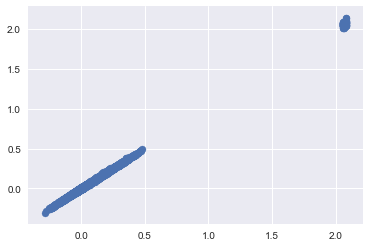

In [7]:
plt.scatter(
    dataset.testing[1],
    p
)
plt.show()

In [9]:
from SCFInitialGuess.utilities.analysis import mf_initializer, measure_all_quantities, make_results_str

results = measure_all_quantities(
    p,
    dataset,
    molecules[1],
    n_electrons,
    mf_initializer,
    dim,
    True
)

[ ] 2018-04-27 23:08:05: Iteration calculation: 0


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:05: Iteration calculation: 1


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:06: Iteration calculation: 2


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:06: Iteration calculation: 3


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:07: Iteration calculation: 4


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:07: Iteration calculation: 5


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:08: Iteration calculation: 6


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:09: Iteration calculation: 7


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:09: Iteration calculation: 8


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:10: Iteration calculation: 9


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:10: Iteration calculation: 10


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:11: Iteration calculation: 11


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:11: Iteration calculation: 12


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:11: Iteration calculation: 13
[ ] 2018-04-27 23:08:12: Iteration calculation: 14


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:12: Iteration calculation: 15


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:12: Iteration calculation: 16
[ ] 2018-04-27 23:08:12: Iteration calculation: 17


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:13: Iteration calculation: 18


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:13: Iteration calculation: 19


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:13: Iteration calculation: 20


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:13: Iteration calculation: 21


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:14: Iteration calculation: 22


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:14: Iteration calculation: 23
[ ] 2018-04-27 23:08:14: Iteration calculation: 24


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:14: Iteration calculation: 25


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:15: Iteration calculation: 26
[ ] 2018-04-27 23:08:15: Iteration calculation: 27


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:15: Iteration calculation: 28


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:15: Iteration calculation: 29
[ ] 2018-04-27 23:08:16: Iteration calculation: 30


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:16: Iteration calculation: 31
[ ] 2018-04-27 23:08:16: Iteration calculation: 32


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:16: Iteration calculation: 33


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:17: Iteration calculation: 34


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:17: Iteration calculation: 35
[ ] 2018-04-27 23:08:17: Iteration calculation: 36


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:17: Iteration calculation: 37
[ ] 2018-04-27 23:08:18: Iteration calculation: 38


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:18: Iteration calculation: 39
[ ] 2018-04-27 23:08:18: Iteration calculation: 40


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:18: Iteration calculation: 41


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:19: Iteration calculation: 42


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:19: Iteration calculation: 43


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:19: Iteration calculation: 44
[ ] 2018-04-27 23:08:19: Iteration calculation: 45


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:20: Iteration calculation: 46
[ ] 2018-04-27 23:08:20: Iteration calculation: 47


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:20: Iteration calculation: 48


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:20: Iteration calculation: 49


Warn: Ipython shell catchs sys.args


In [10]:
print(make_results_str(list(map(lambda x: [x], results))))

--- Absolute Error ---
1.86116E-03 +- 3.20685E-04
--- Symmetry Error ---
0.00000E+00 +- 0.00000E+00
--- Idempotence Error ---
2.77635E-03 +- 5.17674E-04
--- Occupance Error ---
7.57125E-02 +- 4.96368E-02
--- Avg. Iterations ---
3.80000E+01 +- 1.47323E+01



## McWheeny that shit

In [11]:
def mc_wheeny_purification(p,s):
    return (3 * np.dot(np.dot(p, s), p) - np.dot(np.dot(np.dot(np.dot(p, s), p), s), p)) / 2

def multi_mc_wheeny(p, s, n_max=4):
    for i in range(n_max):
        p = mc_wheeny_purification(p, s)
    return p

In [12]:
from SCFInitialGuess.utilities.dataset import make_matrix_batch
s_raw = make_matrix_batch(dataset.inverse_input_transform(dataset.testing[0]), dim, True)
p_batch = make_matrix_batch(p, dim, True)

In [13]:
p_mcw1 = np.array(list(map(lambda x: multi_mc_wheeny(x[0], x[1], n_max=1), zip(p_batch, s_raw))))
p_mcw5 = np.array(list(map(lambda x: multi_mc_wheeny(x[0], x[1], n_max=5), zip(p_batch, s_raw))))

In [14]:
results = measure_all_quantities(
    list(map(lambda x: extract_triu(x, dim), p_mcw1)),
    dataset,
    molecules[1],
    n_electrons,
    mf_initializer,
    dim,
    True
)

[ ] 2018-04-27 23:08:21: Iteration calculation: 0


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:21: Iteration calculation: 1


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:21: Iteration calculation: 2
[ ] 2018-04-27 23:08:22: Iteration calculation: 3

Warn: Ipython shell catchs sys.args


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:22: Iteration calculation: 4


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:22: Iteration calculation: 5


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:23: Iteration calculation: 6


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:23: Iteration calculation: 7
[ ] 2018-04-27 23:08:23: Iteration calculation: 8


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:23: Iteration calculation: 9
[ ] 2018-04-27 23:08:23: Iteration calculation: 10


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:24: Iteration calculation: 11


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:24: Iteration calculation: 12


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:24: Iteration calculation: 13


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:25: Iteration calculation: 14
[ ] 2018-04-27 23:08:25: Iteration calculation: 15


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:25: Iteration calculation: 16
[ ] 2018-04-27 23:08:25: Iteration calculation: 17


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:25: Iteration calculation: 18


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:26: Iteration calculation: 19


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:26: Iteration calculation: 20


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:27: Iteration calculation: 21


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:27: Iteration calculation: 22


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:27: Iteration calculation: 23
[ ] 2018-04-27 23:08:27: Iteration calculation: 24


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:28: Iteration calculation: 25


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:28: Iteration calculation: 26
[ ] 2018-04-27 23:08:28: Iteration calculation: 27


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:29: Iteration calculation: 28


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:29: Iteration calculation: 29
[ ] 2018-04-27 23:08:29: Iteration calculation: 30


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:30: Iteration calculation: 31
[ ] 2018-04-27 23:08:30: Iteration calculation: 32


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:30: Iteration calculation: 33


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:30: Iteration calculation: 34


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:31: Iteration calculation: 35
[ ] 2018-04-27 23:08:31: Iteration calculation: 36


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:31: Iteration calculation: 37
[ ] 2018-04-27 23:08:31: Iteration calculation: 38


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:31: Iteration calculation: 39
[ ] 2018-04-27 23:08:32: Iteration calculation: 40


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:32: Iteration calculation: 41
[ ] 2018-04-27 23:08:32: Iteration calculation: 42


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:32: Iteration calculation: 43


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:33: Iteration calculation: 44
[ ] 2018-04-27 23:08:33: Iteration calculation: 45


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:33: Iteration calculation: 46
[ ] 2018-04-27 23:08:33: Iteration calculation: 47


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:33: Iteration calculation: 48


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:34: Iteration calculation: 49


Warn: Ipython shell catchs sys.args


In [15]:
print(make_results_str(list(map(lambda x: [x], results))))

--- Absolute Error ---
1.12816E-03 +- 2.45094E-04
--- Symmetry Error ---
0.00000E+00 +- 0.00000E+00
--- Idempotence Error ---
6.09720E-05 +- 2.56165E-05
--- Occupance Error ---
3.51749E-03 +- 3.42696E-03
--- Avg. Iterations ---
3.57000E+01 +- 1.61087E+01



In [16]:
results = measure_all_quantities(
    list(map(lambda x: extract_triu(x, dim), p_mcw5)),
    dataset,
    molecules[1],
    n_electrons,
    mf_initializer,
    dim,
    True
)

[ ] 2018-04-27 23:08:34: Iteration calculation: 0


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:35: Iteration calculation: 1


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:35: Iteration calculation: 2
[ ] 2018-04-27 23:08:35: Iteration calculation: 3


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:35: Iteration calculation: 4


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:36: Iteration calculation: 5
[ ] 2018-04-27 23:08:36: Iteration calculation: 6


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:36: Iteration calculation: 7
[ ] 2018-04-27 23:08:37: Iteration calculation: 8


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:37: Iteration calculation: 9
[ ] 2018-04-27 23:08:37: Iteration calculation: 10


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:37: Iteration calculation: 11


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:38: Iteration calculation: 12


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:38: Iteration calculation: 13
[ ] 2018-04-27 23:08:38: Iteration calculation: 14


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:38: Iteration calculation: 15


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:39: Iteration calculation: 16


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:39: Iteration calculation: 17


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:40: Iteration calculation: 18


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:40: Iteration calculation: 19


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:40: Iteration calculation: 20


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:41: Iteration calculation: 21
[ ] 2018-04-27 23:08:41: Iteration calculation: 22


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:41: Iteration calculation: 23
[ ] 2018-04-27 23:08:42: Iteration calculation: 24


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:42: Iteration calculation: 25


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:42: Iteration calculation: 26
[ ] 2018-04-27 23:08:43: Iteration calculation: 27


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:43: Iteration calculation: 28


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:43: Iteration calculation: 29
[ ] 2018-04-27 23:08:44: Iteration calculation: 30


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:44: Iteration calculation: 31
[ ] 2018-04-27 23:08:44: Iteration calculation: 32


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:44: Iteration calculation: 33


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:44: Iteration calculation: 34
[ ] 2018-04-27 23:08:45: Iteration calculation: 35


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:45: Iteration calculation: 36


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:45: Iteration calculation: 37
[ ] 2018-04-27 23:08:45: Iteration calculation: 38


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:46: Iteration calculation: 39
[ ] 2018-04-27 23:08:46: Iteration calculation: 40


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:46: Iteration calculation: 41


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:46: Iteration calculation: 42


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:47: Iteration calculation: 43


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:47: Iteration calculation: 44
[ ] 2018-04-27 23:08:47: Iteration calculation: 45


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:47: Iteration calculation: 46
[ ] 2018-04-27 23:08:47: Iteration calculation: 47


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:48: Iteration calculation: 48


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:08:48: Iteration calculation: 49


Warn: Ipython shell catchs sys.args


In [17]:
print(make_results_str(list(map(lambda x: [x], results))))

--- Absolute Error ---
1.12452E-03 +- 2.44309E-04
--- Symmetry Error ---
0.00000E+00 +- 0.00000E+00
--- Idempotence Error ---
2.69136E-17 +- 2.96618E-18
--- Occupance Error ---
1.42109E-15 +- 1.28095E-15
--- Avg. Iterations ---
3.52000E+01 +- 1.65578E+01



## Classical Ethan

In [18]:
from pyscf.scf import hf

p_sap = [hf.init_guess_by_atom(mol.get_pyscf_molecule()) for mol in molecules[1]]
p_minao = [hf.init_guess_by_minao(mol.get_pyscf_molecule()) for mol in molecules[1]]
p_gwh = [hf.init_guess_by_wolfsberg_helmholtz(mol.get_pyscf_molecule()) for mol in molecules[1]]

Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs s

In [19]:
results = measure_all_quantities(
    list(map(lambda x: extract_triu(x, dim), p_sap)),
    dataset,
    molecules[1],
    n_electrons,
    mf_initializer,
    dim,
    True
)

Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:00: Iteration calculation: 0
[ ] 2018-04-27 23:09:00: Iteration calculation: 1


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:01: Iteration calculation: 2


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:01: Iteration calculation: 3


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:01: Iteration calculation: 4


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:01: Iteration calculation: 5


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:02: Iteration calculation: 6


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:02: Iteration calculation: 7


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:02: Iteration calculation: 8


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:03: Iteration calculation: 9


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:03: Iteration calculation: 10


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:04: Iteration calculation: 11


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:04: Iteration calculation: 12


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:04: Iteration calculation: 13


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:05: Iteration calculation: 14


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:05: Iteration calculation: 15


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:06: Iteration calculation: 16
[ ] 2018-04-27 23:09:06: Iteration calculation: 17


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:06: Iteration calculation: 18


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:06: Iteration calculation: 19


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:07: Iteration calculation: 20


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:07: Iteration calculation: 21


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:08: Iteration calculation: 22


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:08: Iteration calculation: 23


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:09: Iteration calculation: 24


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:09: Iteration calculation: 25


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:10: Iteration calculation: 26
[ ] 2018-04-27 23:09:10: Iteration calculation: 27


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:10: Iteration calculation: 28


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:11: Iteration calculation: 29
[ ] 2018-04-27 23:09:11: Iteration calculation: 30


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:11: Iteration calculation: 31


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:11: Iteration calculation: 32


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:12: Iteration calculation: 33


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:12: Iteration calculation: 34


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:13: Iteration calculation: 35
[ ] 2018-04-27 23:09:13: Iteration calculation: 36


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:13: Iteration calculation: 37
[ ] 2018-04-27 23:09:13: Iteration calculation: 38


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:14: Iteration calculation: 39
[ ] 2018-04-27 23:09:14: Iteration calculation: 40


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:14: Iteration calculation: 41


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:15: Iteration calculation: 42


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:15: Iteration calculation: 43


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:15: Iteration calculation: 44
[ ] 2018-04-27 23:09:15: Iteration calculation: 45


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:16: Iteration calculation: 46
[ ] 2018-04-27 23:09:16: Iteration calculation: 47


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:16: Iteration calculation: 48


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:17: Iteration calculation: 49


Warn: Ipython shell catchs sys.args


In [20]:
print(make_results_str(list(map(lambda x: [x], results))))

--- Absolute Error ---
2.27045E-02 +- 1.41474E-03
--- Symmetry Error ---
0.00000E+00 +- 0.00000E+00
--- Idempotence Error ---
2.16787E-02 +- 1.64255E-03
--- Occupance Error ---
2.98428E-15 +- 2.23115E-15
--- Avg. Iterations ---
3.83400E+01 +- 1.49768E+01



In [21]:
results = measure_all_quantities(
    list(map(lambda x: extract_triu(x, dim), p_minao)),
    dataset,
    molecules[1],
    n_electrons,
    mf_initializer,
    dim,
    True
)

[ ] 2018-04-27 23:09:17: Iteration calculation: 0


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:18: Iteration calculation: 1


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:18: Iteration calculation: 2


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:19: Iteration calculation: 3


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:19: Iteration calculation: 4


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:20: Iteration calculation: 5


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:21: Iteration calculation: 6


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:21: Iteration calculation: 7


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:22: Iteration calculation: 8


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:22: Iteration calculation: 9


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:22: Iteration calculation: 10


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:23: Iteration calculation: 11


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:23: Iteration calculation: 12


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:24: Iteration calculation: 13


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:25: Iteration calculation: 14
[ ] 2018-04-27 23:09:25: Iteration calculation: 15


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:25: Iteration calculation: 16
[ ] 2018-04-27 23:09:25: Iteration calculation: 17


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:26: Iteration calculation: 18
[ ] 2018-04-27 23:09:26: Iteration calculation: 19


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:26: Iteration calculation: 20


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:27: Iteration calculation: 21


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:27: Iteration calculation: 22


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:27: Iteration calculation: 23
[ ] 2018-04-27 23:09:28: Iteration calculation: 24


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:28: Iteration calculation: 25


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:28: Iteration calculation: 26
[ ] 2018-04-27 23:09:28: Iteration calculation: 27


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:29: Iteration calculation: 28
[ ] 2018-04-27 23:09:29: Iteration calculation: 29


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:29: Iteration calculation: 30
[ ] 2018-04-27 23:09:29: Iteration calculation: 31


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:29: Iteration calculation: 32


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:30: Iteration calculation: 33


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:30: Iteration calculation: 34


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:30: Iteration calculation: 35
[ ] 2018-04-27 23:09:30: Iteration calculation: 36


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:30: Iteration calculation: 37
[ ] 2018-04-27 23:09:31: Iteration calculation: 38


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:31: Iteration calculation: 39
[ ] 2018-04-27 23:09:31: Iteration calculation: 40


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:31: Iteration calculation: 41


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:31: Iteration calculation: 42


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:32: Iteration calculation: 43


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:32: Iteration calculation: 44
[ ] 2018-04-27 23:09:32: Iteration calculation: 45


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:32: Iteration calculation: 46
[ ] 2018-04-27 23:09:32: Iteration calculation: 47


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:33: Iteration calculation: 48


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:33: Iteration calculation: 49


Warn: Ipython shell catchs sys.args


In [22]:
print(make_results_str(list(map(lambda x: [x], results))))

--- Absolute Error ---
2.09994E-02 +- 1.46033E-03
--- Symmetry Error ---
0.00000E+00 +- 0.00000E+00
--- Idempotence Error ---
2.16440E-02 +- 2.04699E-03
--- Occupance Error ---
1.28986E-02 +- 5.43811E-05
--- Avg. Iterations ---
3.82000E+01 +- 1.52342E+01



In [23]:
results = measure_all_quantities(
    list(map(lambda x: extract_triu(x, dim), p_gwh)),
    dataset,
    molecules[1],
    n_electrons,
    mf_initializer,
    dim,
    True
)

[ ] 2018-04-27 23:09:33: Iteration calculation: 0


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:34: Iteration calculation: 1


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:34: Iteration calculation: 2
[ ] 2018-04-27 23:09:34: Iteration calculation: 3


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:35: Iteration calculation: 4


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:35: Iteration calculation: 5


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:35: Iteration calculation: 6


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:36: Iteration calculation: 7


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:36: Iteration calculation: 8


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:37: Iteration calculation: 9


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:37: Iteration calculation: 10


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:37: Iteration calculation: 11


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:38: Iteration calculation: 12


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:39: Iteration calculation: 13


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:39: Iteration calculation: 14


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:39: Iteration calculation: 15


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:40: Iteration calculation: 16


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:40: Iteration calculation: 17


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:40: Iteration calculation: 18


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:41: Iteration calculation: 19


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:41: Iteration calculation: 20


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:42: Iteration calculation: 21


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:42: Iteration calculation: 22
[ ] 2018-04-27 23:09:42: Iteration calculation: 23


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:42: Iteration calculation: 24


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:42: Iteration calculation: 25


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:43: Iteration calculation: 26
[ ] 2018-04-27 23:09:43: Iteration calculation: 27


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:43: Iteration calculation: 28


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:44: Iteration calculation: 29
[ ] 2018-04-27 23:09:44: Iteration calculation: 30


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:44: Iteration calculation: 31
[ ] 2018-04-27 23:09:44: Iteration calculation: 32


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:44: Iteration calculation: 33


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:45: Iteration calculation: 34


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:45: Iteration calculation: 35
[ ] 2018-04-27 23:09:45: Iteration calculation: 36


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:46: Iteration calculation: 37
[ ] 2018-04-27 23:09:46: Iteration calculation: 38


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:46: Iteration calculation: 39
[ ] 2018-04-27 23:09:47: Iteration calculation: 40


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:47: Iteration calculation: 41


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:47: Iteration calculation: 42


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:48: Iteration calculation: 43


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:49: Iteration calculation: 44


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:49: Iteration calculation: 45


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:50: Iteration calculation: 46


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:50: Iteration calculation: 47


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:50: Iteration calculation: 48


Warn: Ipython shell catchs sys.args


[ ] 2018-04-27 23:09:51: Iteration calculation: 49


Warn: Ipython shell catchs sys.args


In [24]:
print(make_results_str(list(map(lambda x: [x], results))))

--- Absolute Error ---
1.59708E-02 +- 2.03427E-03
--- Symmetry Error ---
0.00000E+00 +- 0.00000E+00
--- Idempotence Error ---
5.94383E-17 +- 1.35083E-17
--- Occupance Error ---
4.47642E-15 +- 3.35614E-15
--- Avg. Iterations ---
3.74800E+01 +- 1.50030E+01

